# Turkiye-Student-Evaluation-Data-Set

## Problem Statement:-

 In this project we are basically going to perform clustering on the given data and these clusters will signify different categories of students based on the marks, content, course and other features. The clustering algorithm used in the project is K-Means Clustering. The aim is to cluster the data on the basis of the given features, which will ultimately cluster together the student's with similar performance.

## Attribute Information:-

The dataset has  5820 instances with 33 attributes. The description of each column is given below:

instr: Instructor's identifier; values taken from {1,2,3}

class: Course code (descriptor); values taken from {1-13}

repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}

attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}

difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}

Q1: The semester course content, teaching method and evaluation system were provided at the start.

Q2: The course aims and objectives were clearly stated at the beginning of the period.

Q3: The course was worth the amount of credit assigned to it.

Q4: The course was taught according to the syllabus announced on the first day of class.

Q5: The class discussions, homework assignments, applications and studies were satisfactory.

Q6: The textbook and other courses resources were sufficient and up to date.

Q7: The course allowed field work, applications, laboratory, discussion and other studies.

Q8: The quizzes, assignments, projects and exams contributed to helping the learning.

Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.

Q10: My initial expectations about the course were met at the end of the period or year.

Q11: The course was relevant and beneficial to my professional development.

Q12: The course helped me look at life and the world with a new perspective.

Q13: The Instructor's knowledge was relevant and up to date.

Q14: The Instructor came prepared for classes.

Q15: The Instructor taught in accordance with the announced lesson plan.

Q16: The Instructor was committed to the course and was understandable.

Q17: The Instructor arrived on time for classes.

Q18: The Instructor has a smooth and easy to follow delivery/speech.

Q19: The Instructor made effective use of class hours.

Q20: The Instructor explained the course and was eager to be helpful to students.

Q21: The Instructor demonstrated a positive approach to students.

Q22: The Instructor was open and respectful of the views of students about the course.

Q23: The Instructor encouraged participation in the course.

Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.

Q25: The Instructor responded to questions about the course inside and outside of the course.

Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.

Q27: The Instructor provided solutions to exams and discussed them with students.

Q28: The Instructor treated all students in a right and objective manner.

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

## We will be implementing the following steps to achieve the final result:-

1. Importing the necessary Libraries.

2. Importing the dataset.

3. Exploratory Data Analysis

4. Performing feature engineering i.e. modifying existing variables and creating new ones for analysis.

5. Building The model.

6. Visualising the results.


## Step-1: Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Step-2: Importing the dataset

In [2]:
# Using pd.read_csv(dataset) reading the dataset

dataset=pd.read_csv('turkiye-student-evaluation_generic.csv')

## Seeing the dataset:

In [3]:
# using data.head() we can see the dataset

dataset.head()


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Step-3: Exploratory Data Analysis

It is common for data scientists to spend a majority of their time exploring and cleaning data, but approaching this as an opportunity to invest in your model (instead of viewing it as just another chore on your to-do list) will yield big dividends later on in the data science process.

Performing thorough exploratory data analysis (EDA) and cleaning the dataset are not only essential steps, but also a great opportunity to lay the foundation for a strong machine learning model.


## Seeing the shape and size of the dataset

In [4]:
# Using df.shape and df.size will give you the shape and size of the dataset

print(dataset.shape)

print(dataset.size)

(5820, 33)
192060


## Describing the dataset

In [5]:
# Using df.describe() will describe the dataset

dataset.describe()


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


## Seeing the non null values

In [6]:
# Using df.info() we can see number of non null values present

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

## Seeing the list of columns

In [7]:
# Using df.columns we can see the list of all the columns in the dataset

dataset.columns


Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

## Seeing the null values in the dataset

In [8]:
# Using df.isnull().sum will give you the null values

dataset.isnull().sum()


instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

## Visualising the data using seaborn library

There are different types of plots like bar plot, box plot, scatter plot etc.

Scatter plot is very useful when we are analyzing the relation ship between 2 features on x and y axis.

In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.


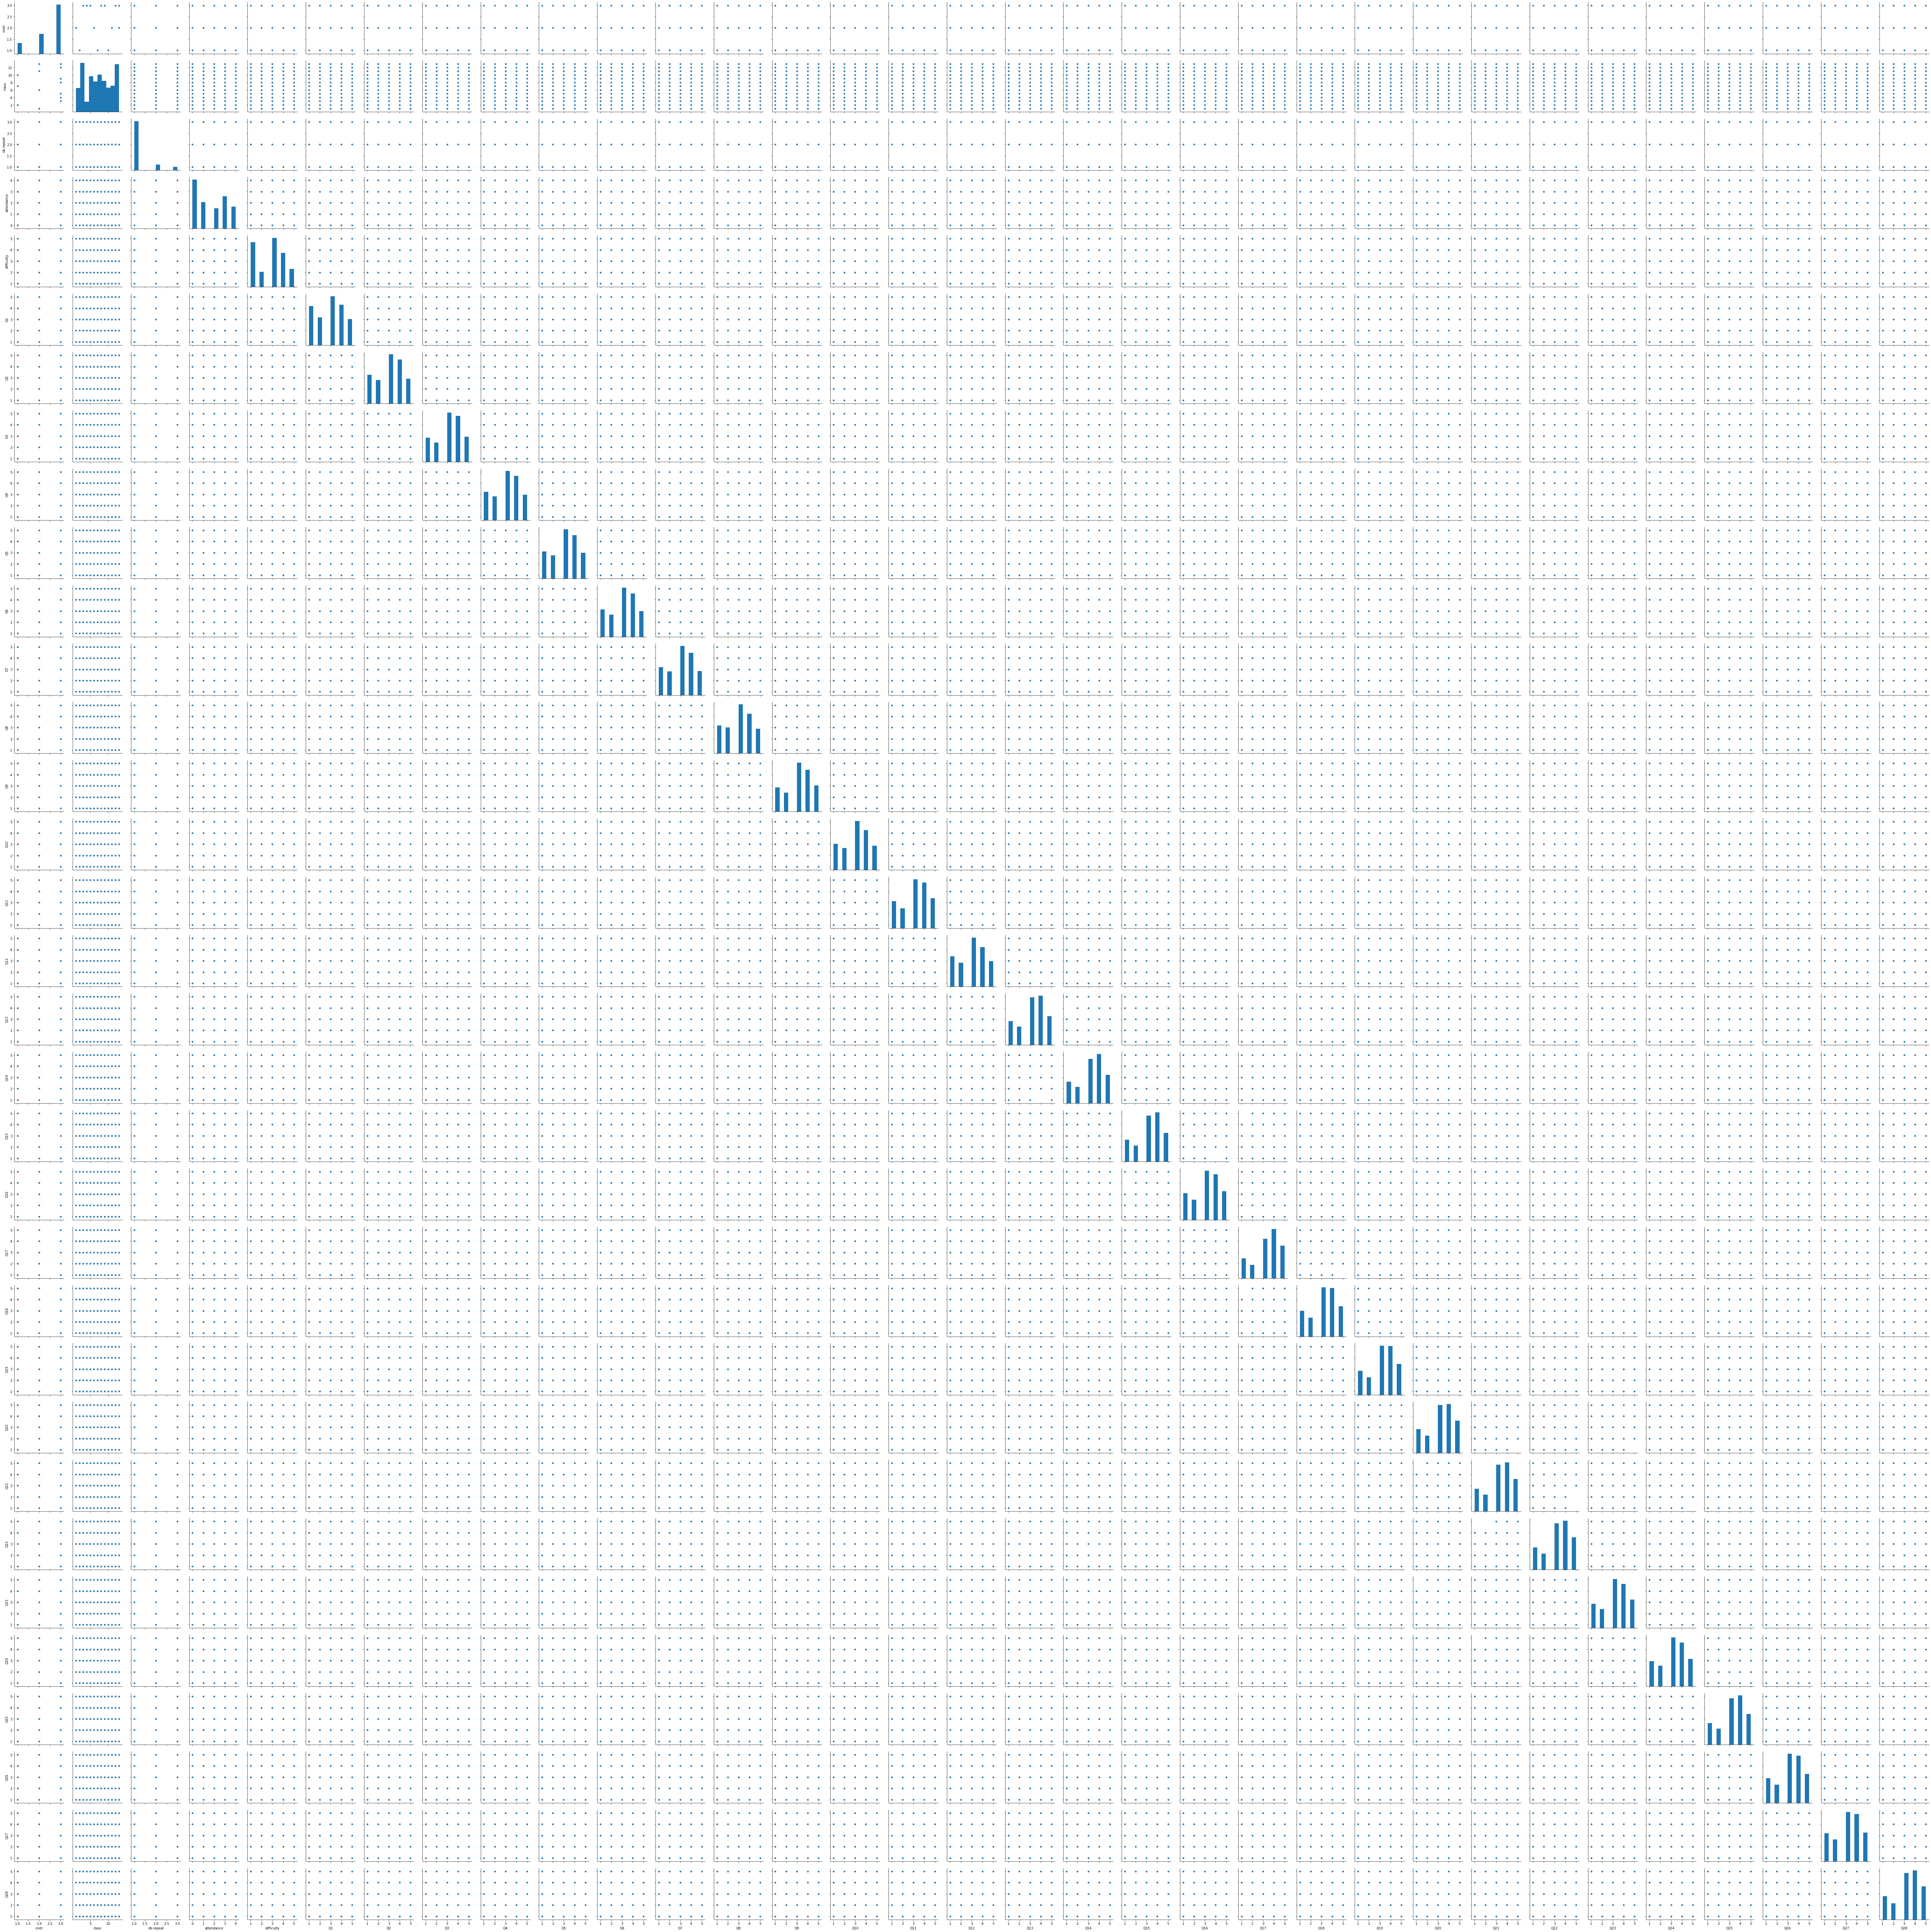

In [10]:
# Using sns.pairplot(df) we can visualize relationship between the features

sns.pairplot(dataset)


## Visualizing the Heat Map

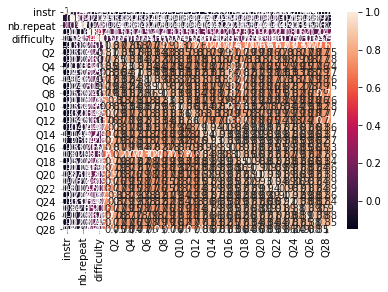

In [11]:
# Using sns.heatmap(dataset.corr(),annot=True) we plot the heat map

sns.heatmap(dataset.corr(),annot=True)


## Step-4: Performing Feature Engineering

We will be performing the following 3 steps:

1.Standard Scaler

2.Normalization

3.Principal Component Analysis 

## Standard Scaler:

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples, and s is the standard deviation of the training samples.

In [14]:
# Importing StandardScaler

from sklearn.preprocessing import StandardScaler

# to implement the standard scaler first create an object for StandardScaler

scaler=StandardScaler()

# now perform scaler.fit() to fit the data

scaler.fit(dataset)

# now perform scaler.transform() to get the scaled data

x=scaler.transform(dataset)


## Normalization:

Normalization is used to scale the data of an attribute so that it falls in a smaller range, such as -1.0 to 1.0 or 0.0 to 1.0. It is generally useful for classification algorithms.

Normalization is generally required when we are dealing with attributes on a different scale, otherwise, it may lead to a dilution in effectiveness of an important equally important attribute(on lower scale) because of other attribute having values on larger scale.
In simple words, when multiple attributes are there but attributes have values on different scales, this may lead to poor data models while performing data mining operations. So they are normalized to bring all the attributes on the same scale.


In [15]:
# now implement the normalization to normalize the data

from sklearn.preprocessing import normalize

x=normalize(x)


## Principal Component Analysis

Principal Components Analysis is an unsupervised learning class of statistical techniques used to explain data in high dimension using smaller number of variables called the principal components.

Assuming we have a set X made up of n measurements each represented by a set of p features, X1, X2, … , Xp. If we want to plot this data in a 2-dimensional plane, we can plot n measurements using two features at a time. If the number of features are more than 3 or four then plotting this in two dimension will be a challenge as the number of plots would be p(p-1)/2 which would be hard to plot.
We would like to visualize this data in two dimension without losing information contained in the data. This is what PCA allows us to do.


In [25]:
# importing PCA

from sklearn.decomposition import PCA

# so to implement PCA first we need to create an object for PCA and also need to mention that how many dimensions we need finally

pca=PCA(n_components=2)

# now do pca.fit(data) to fit the data

pca.fit(x)

# now do pca.transform(data) to transform the higher-dimensionality data to lower dimensions

x_pca=pca.transform(x)


## Step-5: Building The model

The algorithm works as follows:

1. First we initialize k points, called means, randomly.

2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.

3. We repeat the process for a given number of iterations and at the end, we have our clusters.

So, basically we will be following two steps:-

1. Implementing the Elbow method which we will return the optimal value of clusters to be formed.

2. We will implement K-Means algorithm to create the clusters.

## Implementing Elbow Method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 

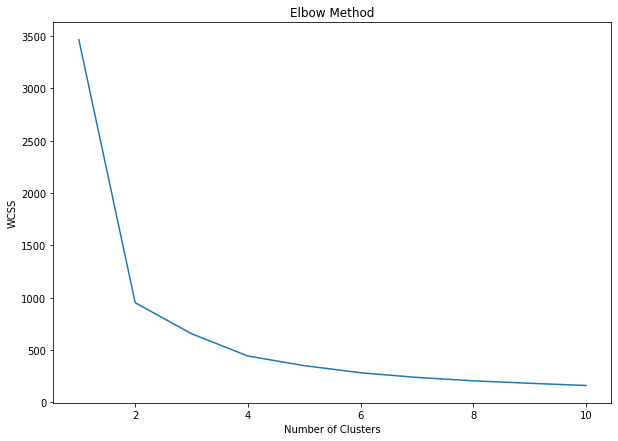

In [19]:
# importing K-Means clustering algorithm

from sklearn.cluster import KMeans

# to implement the elbow method first create an empty list name it as wcss

wcss=[]

# now initiate a for loop ranging between (1,11) and implement k-means clustering for every i number of clusters

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

# now plot the graph between the range(1,11) and the wcss 
plt.figure(figsize=(10,7))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(range(1,11),wcss)

# from the plot we determine the optimal value of k



## Implementing K-Means:

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, Better Euclidean solutions can be found using k-medians and k-medoids.

The above algorithm in pseudocode: 

Initialize k means with random values

For a given number of iterations:
    
Iterate through items

Use kmeans with different number of clusters

Append the list with kmeans.inertia_ values
           

In [26]:
# now with the optimal k value implement the K-Means Clustering Algorithm

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)

# now using kmeans.fit_predict to predict that which data belong to which cluster

y_kmeans=kmeans.fit_predict(x_pca)

## Step-6: Visualising the result

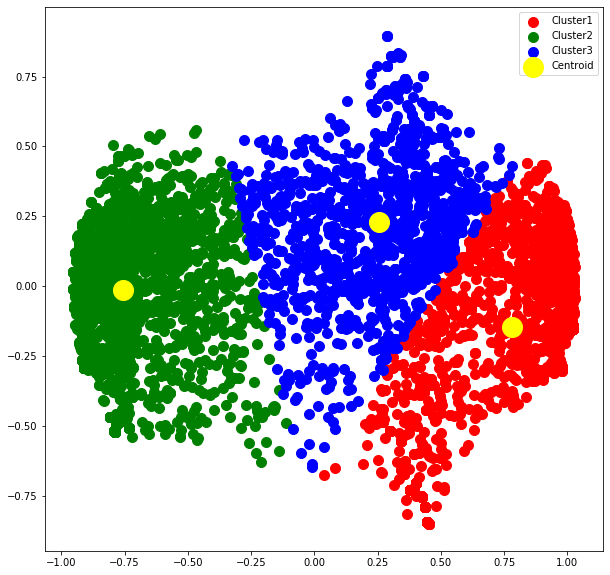

In [28]:
# to visualise the final result use plt.scatter() with respective arguments to view the created clusters
plt.figure(figsize=(10,10))
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=100,c='green',label='Cluster2')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=100,c='blue',label='Cluster3')

# also plot the centroids of the respective clusters using kmeans.cluster_centers_  

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')

# finally you will be able to look at the result using plt.show()

plt.legend()

plt.show()


## Observation:-

From the above figure observed we can see that there are 3 types of clusters formed which signify that their are three types of students based on the evaluation.